In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc,accuracy_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

### Q1. Descriptive Statistics and Distributions 

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. 
2. Use the **IQR rule** to check if 500 is an outlier. 
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.



1. Below I have computed the median and IQR. I have used numpy percentile function to calculate these numbers.

2. I have used IQR rule with the lower bound and upper bound of the IQR. The range of outlier I got is 29 to 37. So, 500 is definitly an outlier because it surpassed the range.

3. Median and IQR are better because the data likely has outliers or is not evenly spread. The mean and Standard deviation can be changed a lot by any very big value or very small value. But the median and IQR shows the values without effection of outliers.

In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
Q1 = np.percentile(data_q1, 25)
median = np.percentile(data_q1, 50)
Q3 = np.percentile(data_q1, 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR", IQR)
print("Outlier range: ",lower_bound, "to", upper_bound)

IQR 2.0
Outlier range:  29.0 to 37.0


### Q2. Bayes and Probability in ML 

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.



1. The desease affects 1 percent of people means 1 person affected out of 100.

given,
Sensitivity = 90%, means test is positive 9 out of 10 times.

Specificity = 92%, means without affected by the desease the test is negative 92 out of 100 times.

so, false positives = 100% - 92% = 8% or 0.08 test positive
so, 99 * 0.08 = 7.92

True positive = 0.9
False Positive = 7.92

now, we know,
PPV = TP/TP+FP
PPV = 0.9/0.9+7.92
PPV = 0.102 ≈ 10

2. If the prevalence rises to 20%, the PPV will increase. In Bayes' theorem, prevalence is known as Prior Probabilty of having the desease before taking the test. So, when the desease is more likely to happen, the true positives increase, so the PPV value also increase.

### Q3. ML Pipeline Thinking 

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.




1. The type of ML task is binary classification because the target variable premium_user is 0 or 1.

2. Four preprocessing steps that would be reasonable for this dataset:

•Handle Missing value.
•Encode the categorical variable region.
•Scale or normalize the numeric features
•Checking outliers in the numeric column

3. First, I would inspect the raw data, to understand distributions, missing values and data qualities. Next, I would clean the data by handling missing values and outliers. Then I encode the categorical feature using one hot encoding. Then I scale the numeric features. After these steps, I then split the dataset into training and tests to avoid data leakage. Now I train a classification model using the training data.

---

## SECTION B – Applied Coding Problems


---

### Q4. Applied EDA and Preprocessing

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks :**

1. **Compact EDA using pandas** 
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas**
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** 
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training.



Sum of Missing values
 age             2
region          0
purchases       1
premium_user    0
dtype: int64
Sum of unique values
 age             5
region          4
purchases       6
premium_user    2
dtype: int64
Correlation among numeric columns
                    age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


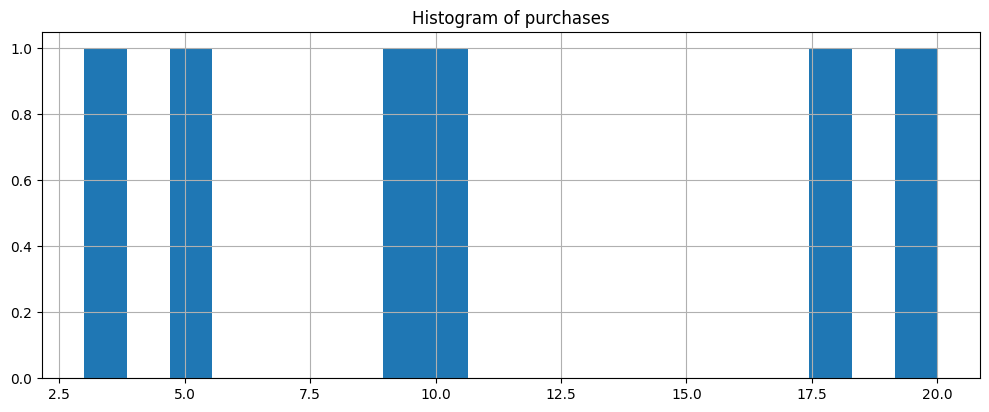

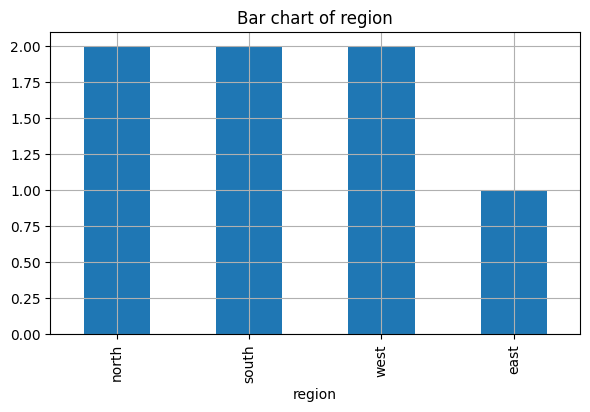

/tmp/ipython-input-2162608454.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df["age"].median(),inplace=True)
/tmp/ipython-input-2162608454.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,premium_user,age,purchases,premium_user,age,purchases,premium_user,region_east,region_north,region_south,region_west
0,0,25.0,3.000000,0,25.0,3.000000,0,0,1,0,0
1,1,30.0,10.000000,1,30.0,10.000000,1,0,0,1,0
2,0,30.0,5.000000,0,30.0,5.000000,0,0,1,0,0
3,0,22.0,10.833333,0,22.0,10.833333,0,1,0,0,0
4,1,45.0,20.000000,1,45.0,20.000000,1,0,0,0,1
5,1,52.0,18.000000,1,52.0,18.000000,1,0,0,0,1
6,0,30.0,9.000000,0,30.0,9.000000,0,0,0,1,0


In [ ]:

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

# 1. Answer: Compact EDA using pandas

# Missing & Unique values
print("Sum of Missing values\n",df.isnull().sum())
print("Sum of unique values\n",df.nunique())

# Correlation among numeric columns.
num_cols = ["age","purchases","premium_user"]
corr_matrix = df[num_cols].corr()
print("Correlation among numeric columns\n",corr_matrix)

# Histogram of purchases
df["purchases"].hist(bins=20, figsize=(10, 4))
plt.tight_layout()
plt.title(f"Histogram of purchases")
plt.show()

# Bar chart of region
df["region"].value_counts().plot(kind='bar')
plt.tight_layout()
plt.title(f"Bar chart of region")
plt.show()

# Impute age with median.
df['age'].fillna(df["age"].median(),inplace=True)

# Impute purchases with mean.
df['purchases'].fillna(df["purchases"].mean(), inplace=True)

# One hot encode region.
df_enc = df.copy()
cat_col = df['region']
target_col = 'premium_user'

encoded_df = pd.get_dummies(
    df,
    columns = ["region"],
    dtype = int
)
df_model = pd.concat([
    df_enc[[target_col] + num_cols],
    encoded_df
], axis=1)

# display(df_model.head())

# Scale all numeric columns using RobustScaler.
df_num =df[num_cols]

# step 1: median, quartiles, IQR
md = df_num.median()
q1 = df_num.quantile(.25)
q3 = df_num.quantile(.75)
iqr = q3-q1

# step 2: center by median
ct = df_num - md
ct

# step 3: divide by IQR
rb = ct/iqr
rb.round(2)

df_model


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis 

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks :**

1. Create the dataframe `df2`.   
2. Split the data into **train and test** with 80 percent train and 20 percent test. 
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`.
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. 
5. Compute the following metrics on the test set.   
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. 



In [ ]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})


In [ ]:
# 2. Split the data
X = df2[['area_sqft', 'bedrooms']]
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

print("m: ", model.coef_[0])
print("c: ", model.intercept_)

y_pred = model.predict(X_test)
print("Predictions on test data:", y_pred)


m:  0.15384615384615388
c:  -33.84615384615387
Predictions on test data: [100.         130.76923077]


In [ ]:
# Compute Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

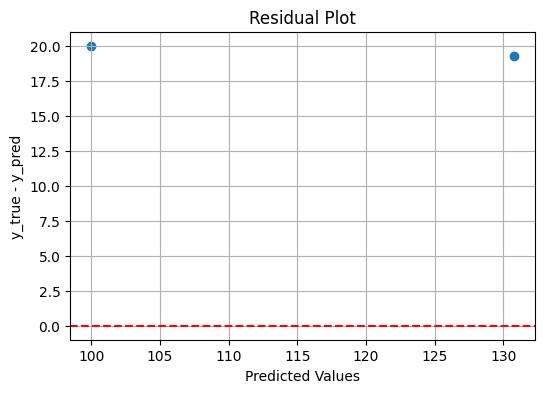

In [ ]:
# residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("y_true - y_pred")
plt.title("Residual Plot")
plt.show()

At the residual plot I can see that the dots are all high above the zero line, the actual values are higher than what the model predicted.


---

### Q6. Applied Classification, Metrics, Trees and ROC 

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics **

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC **

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset **

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

threshold = 0.5
y_pred_1 = (y_prob >= threshold).astype(int)
y_pred_1

# Accuracy, precision, recall, F1
cm = confusion_matrix(y_true, y_pred_1)
acc = accuracy_score(y_true,y_pred_1)
prec = precision_score(y_true,y_pred_1)
rec = recall_score(y_true,y_pred_1)
f1 = f1_score(y_true,y_pred_1)
print("Confusion Matrix, Accuracy Score, Precision, Recall, F1 score : ",cm, acc, prec, rec, f1)

threshold = 0.3
y_pred_2 = (y_prob >= threshold).astype(int)
y_pred_2

# Accuracy, precision, recall, F1
cm = confusion_matrix(y_true, y_pred_2)
acc = accuracy_score(y_true,y_pred_2)
prec = precision_score(y_true,y_pred_2)
rec = recall_score(y_true,y_pred_2)
f1 = f1_score(y_true,y_pred_2)
print("Confusion Matrix, Accuracy Score, Precision, Recall, F1 score : ",cm, acc, prec, rec, f1)



Confusion Matrix, Accuracy Score, Precision, Recall, F1 score :  [[5 0]
 [0 5]] 1.0 1.0 1.0 1.0
Confusion Matrix, Accuracy Score, Precision, Recall, F1 score :  [[3 2]
 [0 5]] 0.8 0.7142857142857143 1.0 0.8333333333333334


Lowering the threshold from 0.5 to 0.3, recall increases because more actual positive cases are correctly found. On the other hand precision decreases because some negative cases are wrongly predicted as positive. This happens because lower a threshold makes the model easiar to say yes to the positive classes.

AUC:  1.0


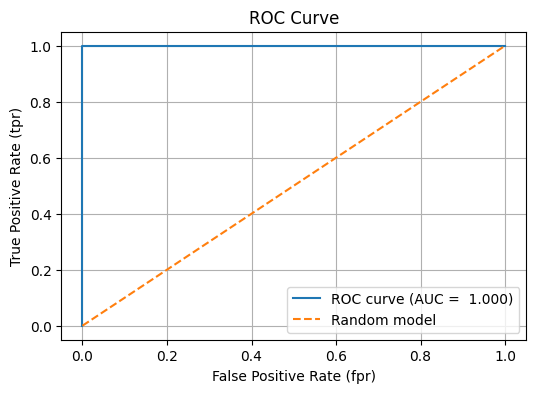

AUC: 1.000


In [ ]:
#ROC curve and AUC
fpr,tpr,thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr,tpr)
print('AUC: ',round(roc_auc, 3))

#Plot
plt.figure()
plt.plot(fpr,tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"AUC: {roc_auc:.3f}")

A high AUC means the model distinguish positive and negative classes more well across different thresholds.
A low AUC means the model has poor ability and performs close to random guessing.

In [ ]:
# Decision tree

df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

hours = df3[["hours"]]
passed = df3["passed"]

tree_df3 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_df3.fit(hours,passed)


DecisionTreeClassifier(max_depth=2, random_state=42)

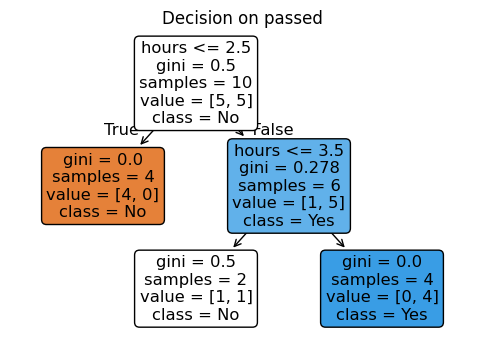

In [ ]:
#Visualize the tree
plt.figure(figsize=(6,4))
plot_tree(
    tree_df3,
    feature_names=['hours'],
    class_names = ['No', 'Yes'],
    filled = True,
    rounded = True,
)
plt.title("Decision on passed")
plt.show()

This decision tree shows signs of overfitting because it creates complex splits for a very small dataset of only 10 samples.